# SMAI ASSIGNMENT 2 - Problem 4.1
## Srujana Vanka - 2020102005


## The dataset has 99 different shapes KIMIA-99. The task is to find the align the remaining shapes based on the orientation of the given template shape

In [2]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/f5/d0/2e455d894ec0d6527e662ad55e70c04f421ad83a6fd0a54c3dd73c411282/opencv_python-4.8.0.76-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [55]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random


### **Assumptions:**
- Assuming that the black parts of the images are meaningful and should be aligned.
- The alignment quality depends on the similarity of the black regions between the template and dataset images. If the black regions differ significantly, the alignment may not be accurate.
  

In [56]:
def align_images_with_template_orientation(data_path, output_folder):
    # Get the list of image filenames in the dataset directory
    image_filenames = os.listdir(data_path)

    if not image_filenames:
        print("No images found in the dataset directory.")
        return

    # First image in grayscale as the template image
    template_image_path = os.path.join(data_path, image_filenames[0])
    template = cv2.imread(template_image_path, cv2.IMREAD_GRAYSCALE)

    if template is None:
        print(f"Unable to load the template image from {template_image_path}")
        return

    # Initialize a list to store aligned images
    aligned_images = []

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through the dataset, skipping the first image (template)
    for filename in image_filenames[1:]:
        dataset_image_path = os.path.join(data_path, filename)

        dataset_image = cv2.imread(dataset_image_path, cv2.IMREAD_GRAYSCALE)

        if dataset_image is None:
            print(f"Unable to load image: {dataset_image_path}")
            continue  # To skip the images that are not loading

        # Finding the centroid of black pixels in both images
        template_centroid = np.argwhere(template == 0).mean(axis=0)
        dataset_centroid = np.argwhere(dataset_image == 0).mean(axis=0)

        # Calculate the rotation angle needed to align the centroids
        rotation_angle = np.arctan2(template_centroid[0] - dataset_centroid[0],
                                     template_centroid[1] - dataset_centroid[1]) * (180 / np.pi)

        # Rotate the dataset image to align it with the template
        rows, cols = dataset_image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
        aligned_image = cv2.warpAffine(dataset_image, rotation_matrix, (cols, rows))

        # Saving the aligned images in a new folder - in the same directory
        output_path = os.path.join(output_folder, f'Aligned_{filename}')
        cv2.imwrite(output_path, aligned_image)
        aligned_images.append(aligned_image)

    print(f"Images aligned and saved in the '{output_folder}' folder.")

    return aligned_images


### **Flowchart of the algorithm:**

1. The process begins by initializing key components, such as lists for storing aligned images and creating an output folder for saving the aligned images.
   
2. Template Selection: The first image in the dataset is chosen as the template image. It is loaded in grayscale and serves as the reference for alignment.
   
3. Dataset Iteration: The algorithm iterates through the remaining dataset images, excluding the template image.
   
4. Alignment Calculation: For each dataset image, the algorithm calculates the rotation angle required to align it with the template image.

5. Centroid Calculation: The centroids (average positions) of the black (foreground) pixels are determined in both the template and dataset images.

6. Rotation Angle Determination: The rotation angle needed to align the centroids is computed. This angle is based on the difference in positions between the centroids.

7. Image Rotation: A rotation matrix is created using the calculated angle, and the dataset image is rotated accordingly.
   
9. Image Saving: The aligned dataset image is saved in an output folder with a filename prefixed by "Aligned_".

Images aligned and saved in the '/home/sruj/Downloads/Dataset_4_1/AlignedImages' folder.


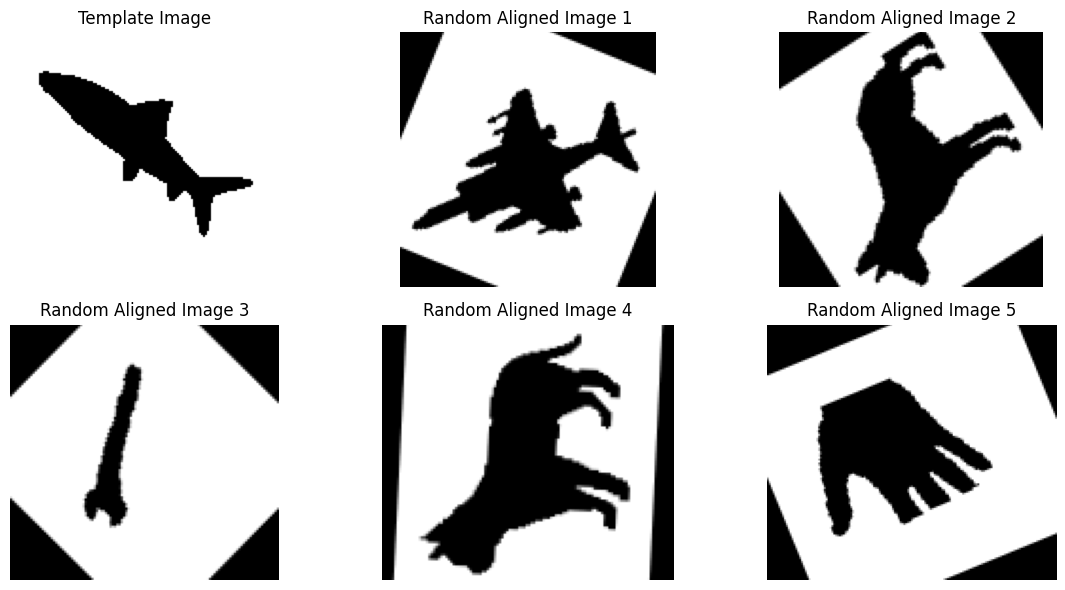

In [70]:
# First image in the dataset is used as the template image 
data_path = '/home/sruj/Downloads/Dataset_4_1/KIMIA_dataset'
output_folder = '/home/sruj/Downloads/Dataset_4_1/AlignedImages'

try:
    aligned_images = align_images_with_template_orientation(data_path, output_folder)

    # Display the template image
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    template_image = cv2.imread(template_image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(template_image, cmap='gray')
    plt.title('Template Image')
    plt.axis('off')


    # Select 5 random indices from the list of aligned images
    random_indices = random.sample(range(len(aligned_images)), 5)

    # Display the 5 random aligned images
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 3, i + 2)
        plt.imshow(aligned_images[idx], cmap='gray')
        plt.title(f'Random Aligned Image {i + 1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")